#### Modern Wage Dynamics 
ASU Math+ ABM Spring School 2024 

J M Applegate  
February 14, 2024 
With price and wage set according to hours, and useable money and inventory.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

#### import functions from model files
from series_parameters import series_params
from initialisation_functions import *
from firm_functions import *
from household_functions import *
from market_functions import *
from simulation import simulation

plt.rc('font',**{'family':'sans-serif','sans-serif':['Futura']})

In [2]:


from numpy.random import default_rng
from operator import itemgetter

import warnings
warnings.filterwarnings('ignore')

#### series setup
directory, series_name, seed, reps, n_sets, series_params_list = series_params()

#### verify directory exists
from pathlib import Path
Path(directory).mkdir(parents=True, exist_ok=True)

#### initialise rng to be used by simulation series
rng = default_rng(seed)

print('This experiment consists of {} simulations'.format(n_sets * reps))
print('consisting of {} parameter sets.'.format(n_sets))

#### intitialise storage vehicle for series results
series_results = []

#### main body of multi parameter set code
for params in series_params_list:
    sim_results = simulation(*params, rng)
    series_results = series_results + sim_results

print('\nFinished series.')

macro_labels = ['set', 'run', 'step', 't_max', 'n', 'H_max', 'A', 'gamma', 'mu', 'S_N', 'omega_0', 'p_0', 'delta_0', 
                'theta', 'min_pct', 'pct_change',
                'I', 'pi', 'total_pi', 'omega', 'p', 'H_D', 'S_S', 'S_P', 'S_hat', 'N', 'H_S', 'H_M', 'S_D', 'S_M',
                'total_H_N', 'total_H_O','total_m', 'med_m', 'mean_m', 'max_m', 'min_m', 'mean_U', 'mean_alpha']

#### Transform list of lists into dataframes
series_results_frame = pd.DataFrame(series_results, columns = macro_labels)

#### For troubleshooting
#print(series_results_frame)

#### Save dataframe to directory as csv file.
print('Writing to files.')
prefix = directory + 'series_' + series_name
series_results_frame.to_csv(prefix + '.csv', index = False)
print('Series results written to', prefix + '.csv')


This experiment consists of 100 simulations
consisting of 1 parameter sets.

Finished series.
Writing to files.
Series results written to ./results/series_ABMSS2024_1.csv


In [3]:
srf = series_results_frame
del(series_results_frame)
srf['mean_beta'] = 1 - srf['mean_alpha']
srf['ratio'] = srf['omega'] / srf['p']
srf['sugar_diff'] = abs(srf['S_S'] - srf['S_D'])
srf['hours_diff'] = abs(srf['S_S'] - srf['S_D'])
final_srf = srf[srf['step'] == max(srf['step'])]

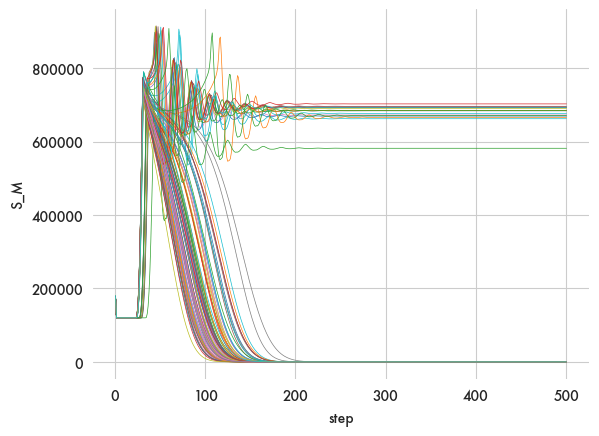

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',**{'family':'sans-serif','sans-serif':['Futura']})

plot_data = srf[['step', 'S_M', 'run']][srf['step'] > 0][srf['theta'] == .1]
plot_data_wide = pd.pivot_table(plot_data, index = ['step'], values = ['S_M'], columns = ['run'])
plot_data_wide.plot(linewidth=.5, legend=None)

plt.ylabel('S_M')
#plt.title('Household Simulation Results')
sns.despine(left = True, bottom = True)

In [5]:
plot = plot_data_wide.plot()
plt.close()
colours = plot.lines
colour_list = []
for r in range(100):
    colour_list.append(colours[r].get_color())

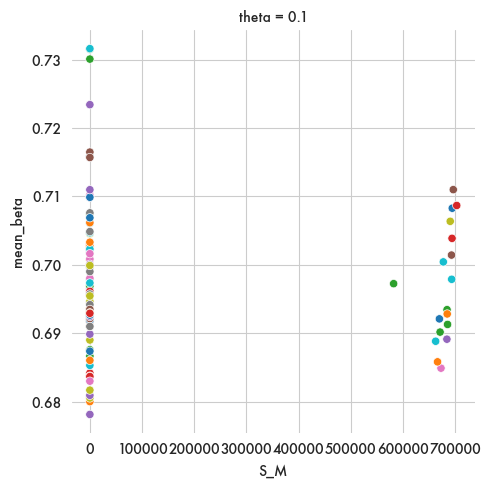

In [6]:
sns.relplot(
    data=final_srf,
    x="S_M", y="mean_beta",
    hue="run", col="theta",
    kind="scatter", 
    height=5, aspect=1, legend=None,
    palette = colour_list
)
sns.despine(left = True, bottom = True)
#plt.savefig('HoursAnnealingScanSingleHouseholdBetas.pdf')